# Test Henon Map Data Iter

This is a notebook for testing the Henon Map Data Iter

## Import everything

Modify setting for pytorch

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
currentPath=os.getcwd()

Import matplotlib and others

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Import Henon Map Generator

In [3]:
from HenonMapDataGen import HenonMapDataGen

## Henon Map Data Iter

Set save path

In [4]:
savepath=os.path.join(currentPath,'..\data\HenonMap\Test')
filename='HenonMapTest3.csv'

Read the data

In [5]:
hmap=HenonMapDataGen(savepath=savepath)
hmap.read_from_CSV(filename)

In [6]:
print(hmap)

Data Info:
----------------------------------------
Data Size: 1000
Data Interval: 5
Data ParamA: 1.4, Data ParamB: 0.3
Data Bound: -1.2
Data HeavyMem: False
Data Seed:
 [0.031695751652105884, 0.051268733966253546, 0.0720924128606658, 0.09583012603424566, 0.008422309710949259, 0.07424665082080417, 0.019262511639782976, 0.044727260803307495, 0.07813401087877536, 0.016359929459163803]
----------------------------------------


Data iter parameters

In [7]:
testSetRatio=0.2
numStep=10
batchSize=2

### Test the random data iter

In [8]:
trainIter,testIter=hmap.get_data_iter(testSetRatio,numStep,batchSize)

TrainIter

In [9]:
X,Y=next(iter(trainIter))
print('X='+str(X))
print('Y='+str(Y))

X=tensor([[-0.0546, -0.8269,  1.2203,  0.5509,  0.5948,  1.2726,  0.3755, -1.0486,
          0.7237,  0.6997],
        [ 0.5200,  1.0611, -0.9897,  1.2203, -0.5874,  0.7441, -0.6957, -0.0223,
         -1.1532,  0.8222]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.2000,  0.5545, -0.1732,
          0.4320,  0.4930],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3808,  0.6407,  0.7024,
         -0.4956, -0.1226]])


In [10]:
print('total number of train data:',len(trainIter))

total number of train data: 79


TestIter

In [11]:
X,Y=next(iter(testIter))
print('X='+str(X))
print('Y='+str(Y))

X=tensor([[-0.6433,  0.3576, -0.0564, -0.8996,  0.7065,  0.0606,  1.0166,  1.2326,
          0.2077,  0.3232],
        [ 0.9615,  1.2190, -0.4561, -0.5473, -0.3310, -0.1815, -1.0434,  1.0251,
          0.9052,  1.1507]])
Y=tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.8019, -0.3395, -1.1439,
          0.6697,  1.0658],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.2423, -0.1584, -0.6079,
         -0.3113, -0.9531]])


In [12]:
print('total number of test data:',len(testIter))

total number of test data: 20


Visualize the data

Text(0, 0.5, 'Y')

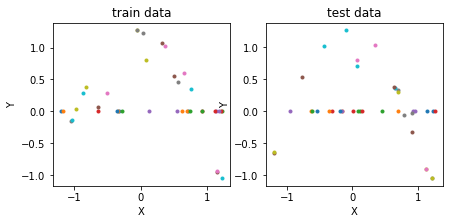

In [13]:
#Visualize the data via matplotlib
fig,axes=plt.subplots(1,2,figsize=(7,3))
for X,Y in trainIter:
    axes[0].plot(X,Y,'.')
axes[0].set_title('train data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
for X,Y in testIter:
    axes[1].plot(X,Y,'.')
axes[1].set_title('test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

### Test the sequential data iter

In [14]:
trainIter,testIter=hmap.get_data_iter(testSetRatio,numStep,batchSize,mask=0,shuffle=False)

TrainIter

In [15]:
i=0
for X,Y in trainIter:
    i+=1
    print('Data'+str(i))
    print('X='+str(X))
    print('Y='+str(Y))
    if i==3:
        break

Data1
X=tensor([[ 0.0958,  0.0084,  0.0742,  0.0193,  0.0447,  0.0781,  0.0164,  1.0018,
          1.0149,  1.0188],
        [ 0.0676, -1.1059,  0.6291,  0.4568, -0.3446,  0.8018, -0.3513,  0.6204,
          0.9226,  1.1096]])
Y=tensor([[ 0.0000,  0.0000,  1.0018,  1.0149,  1.0188,  1.0202,  1.0022, -0.3827,
         -0.4361, -0.4398],
        [ 0.8018, -0.3513,  0.6204,  0.9226,  1.1096,  0.1203,  0.4955,  0.6499,
         -0.0546, -0.8269]])
Data2
X=tensor([[ 1.0202,  1.0022, -0.3827, -0.4361, -0.4398, -0.4337, -0.4011,  1.0954,
          1.0382,  1.0349],
        [ 0.1203,  0.4955,  0.6499, -0.0546, -0.8269,  1.2203,  0.5509,  0.5948,
          1.2726,  0.3755]])
Y=tensor([[-0.4337, -0.4011,  1.0954,  1.0382,  1.0349,  1.0427,  1.0754, -0.7948,
         -0.6397, -0.6313],
        [ 1.2203,  0.5509,  0.5948,  1.2726,  0.3755, -1.0486,  0.7237,  0.6997,
         -1.2000,  0.5545]])
Data3
X=tensor([[ 1.0427,  1.0754, -0.7948, -0.6397, -0.6313, -0.6523, -0.7394,  0.4442,
          0.738

In [16]:
print(len(trainIter))

78


TestIter

In [17]:
i=0
for X,Y in testIter:
    i+=1
    print('Data'+str(i))
    print('X='+str(X))
    print('Y='+str(Y))
    if i==3:
        break

Data1
X=tensor([[-0.4437, -1.0683,  0.1348,  0.5275,  0.9945,  1.0393, -0.2389,  0.6959,
          0.7316, -0.2637],
        [ 1.1584,  1.2193,  0.2592, -1.2000, -0.9447, -0.9750, -1.0445,  1.1463,
         -0.6344,  0.0949]])
Y=tensor([[ 1.0393, -0.2389,  0.6959,  0.7316, -0.2637, -0.6454,  0.5996,  0.3624,
          0.4088,  1.2010],
        [-0.9750, -1.0445,  1.1463, -0.6344,  0.0949,  0.0165, -0.1615, -0.7618,
          0.0765,  0.7040]])
Data2
X=tensor([[-0.6454,  0.5996,  0.3624,  0.4088,  1.2010,  0.7286,  0.4250,  1.0249,
          0.9855, -1.0985],
        [ 0.0165, -0.1615, -0.7618,  0.0765,  0.7040,  0.7071,  0.6501,  0.5315,
          0.8015,  0.3346]])
Y=tensor([[ 0.7286,  0.4250,  1.0249,  0.9855, -1.0985,  0.0632,  0.9270, -0.3618,
         -0.2371, -0.3290],
        [ 0.7071,  0.6501,  0.5315,  0.8015,  0.3346,  0.3050,  0.3598,  0.3760,
          0.1237,  1.0544]])
Data3
X=tensor([[ 0.0632,  0.9270, -0.3618, -0.2371, -0.3290,  1.2130, -0.0756,  1.1242,
          1.217

In [18]:
print(len(testIter))

18


Visualize the data

Text(0, 0.5, 'Y')

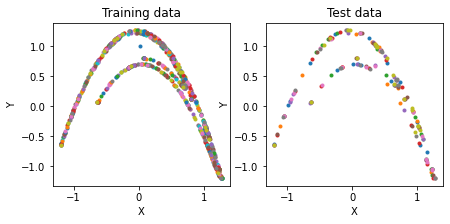

In [19]:
#Visualize the data via matplotlib
fig,axes=plt.subplots(1,2,figsize=(7,3))
for X,Y in trainIter:
    axes[0].plot(X.flatten(),Y.flatten(),'.')
axes[0].set_title('Training data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

for X,Y in testIter:
    axes[1].plot(X.flatten(),Y.flatten(),'.')
axes[1].set_title('Test data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# End of the test